# Evaluation data frames

These dataframes contain extensive evaluations of the quality of the OCR, compared with ground truth. See: https://github.com/Giovanni1085/KB_OCR_impact/wiki/Evaluations.

In [1]:
from glob import glob
import jellyfish
import numpy as np
import os, codecs, re
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import random
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

seed = 43
random.seed(seed)
np.random.seed(seed)

import nltk, gensim, sklearn, spacy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# list of data frames

df_anp = pd.read_csv("add_evaluation/full_df_ANP_evaluation.csv", compression="gzip")
df_books = pd.read_csv("add_evaluation/full_df_books_evaluation.csv", compression="gzip")
df_dbnl = pd.read_csv("add_evaluation/full_df_DBNL_OCR_evaluation.csv", compression="gzip")
df_impact = pd.read_csv("add_evaluation/full_df_impact_evaluation.csv", compression="gzip")
df_meertens = pd.read_csv("add_evaluation/full_df_meertens_evaluation.csv", compression="gzip")

In [9]:
print(df_anp.shape)
df_anp.head(3)

(204, 13)


,Unnamed: 0,Did,Doriginal,gt text,ocr text,CER,WER,WER (order independent),jaccard_coefficient,lookup gt,lookup ocr,levenshtein_dist,levenshtein_dist_normalized
0,0,537184,1937:02:14:1,RADIO 2. Tweed� uitzending van I4 Februari I9...,"b""\r\r\n RADIO 2+ Tweore uitzending van I^ ...",13.12,48.83,42.99,0.37,83.333333,75.54,408,0.14
1,1,537185,1937:02:15:1,RADIO I. Eerste uitzending van I5 Februari I9...,b'\r\r\n RADIO I. Eerste uitzending van 15 ...,16.85,46.70,43.27,0.49,85.169492,88.93,464,0.16
2,2,537186,1937:02:16:1,RADIO I Eerste uitzending van I6 Februari I93...,"b""\r\r\n RADIO I Eerste uitzending van l6 F...",9.51,37.80,34.63,0.51,82.278481,88.17,324,0.11


In [10]:
print(df_books.shape)
df_books.head(3)

(1567, 13)


,Unnamed: 0,Did,Doriginal,ocr text,gt text,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup gt,dictionary lookup ocr,levenshtein_dist,levenshtein_dist_normalized
0,0,538813,dpo:3077:0213,"\nde Gebeurtenis/en in 1787 enz, voorgevallen,...",de Gebeurtenisſen in I787 enz. voorgevallen. ...,5.20,21.02,20.17,0.58,84.82,80.73,136,0.07
1,1,529591,dpo:113:0070,"\n66 B Y L A G E N,\nfcheep brengen der Goeder...",66 BYLAGEN. fcheep brengen der Goederen en Pe...,3.32,15.66,13.74,0.67,95.61,87.77,104,0.05
2,2,529647,dpo:35:0038.tif,\n£0 ISRAËL IN EGYPTE.\ngezegenden Job; zynde ...,20 ISRAEL IN EGYPTE. gezegenden JOB; zynde ee...,5.35,17.35,16.33,0.65,96.18,89.92,87,0.08


In [11]:
print(df_dbnl.shape)
df_dbnl.head(3)

(219, 15)


,Unnamed: 0,filename,text_ground,genre,subgenre,text_ocr,title,year,edition,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup gt,dictionary lookup ocr
0,0,_vad003182501,Boekbeschouwing. De gemoedsgesteldheid van Da...,"sec - letterkunde,non-fictie",tijdschrift / jaarboek,"SEM1N 9 ( SIS) s.. B OEKBESCHOUWI ' , vOOR 1 8...",Vaderlandsche letteroefeningen. Jaargang 1825,1825,1ste druk,84.53,79.03,34.03,0.281618,75.44,35.50
1,1,_vad003182401,Boekbeschouwing. Mijne Gronden voor het Chris...,"sec - letterkunde,non-fictie",tijdschrift / jaarboek,"BOIKBESCHOUWING VOOR i824. VARLANDSCHE DE , L...",Vaderlandsche letteroefeningen. Jaargang 1824,1824,1ste druk,53.05,72.53,26.50,0.315151,77.59,39.74
2,2,_taa001taal01,Voorbericht. Indien de waarde eener wetenscha...,sec - taalkunde,tijdschrift / jaarboek,﻿D ETA ALG I D S. D ETA ALG I D S. T IJ D S C ...,De Taalgids. Jaargang 1,1859,1ste druk,82.34,104.89,14.50,0.599973,81.24,68.27


In [12]:
print(df_impact.shape)
df_impact.head(3)

(2000, 26)


,Unnamed: 0,filename,text_ground,text_ocr,word_level_confidence_ocr,text_reocr,word_level_confidence_reocr,word_level_average_confidence_ocr,word_level_average_confidence_reocr,CER_ocr,...,language,jaccard_coefficient_ocr,jaccard_coefficient_reocr,dictionary lookup gt,dictionary lookup ocr,dictionary lookup reocr,levenshtein_dist_ocr,levenshtein_dist_normalized_ocr,levenshtein_dist_reocr,levenshtein_dist_normalized_reocr
0,0,DDD_010197037_001.jp2,"['No.', '9922.', 'Tweede', 'Blad.', 'Vrijdag',...","['JSo.', '9822', 'xTweede', 'Blad.', 'Vrijdag'...","[0.27, 0.27, 0.29, 0.95, 0.98, 1.0, 0.97, 0.67...","['ISO.', '9922', '-Tweede', 'Blad.', 'ss*', 'V...","[0.94, 0.23, 0.97, 0.95, 0.16, 0.97, 0.96, 0.9...",0.719354,0.718463,12.93,...,nl,0.481129,0.487461,89.44,75.36,75.96,3262,0.130480,3118,0.123037
1,1,DDD_011219339_001.jp2,"['De', 'Surinamer', 'Redactie', 'J.', 'WILLEBR...","['De', 'Surinamer', '•v*', 'WILLEBRANDS:i^', '...","[0.96, 0.98, 0.46, 0.48, 0.99, 0.97, 0.99, 0.5...","['Whd^Mmumr', 'Redactie', 'J.', 'WILLEBRANDS',...","[0.25, 0.99, 0.83, 0.84, 0.98, 0.97, 0.99, 0.9...",0.765606,0.889051,27.15,...,nl,0.355100,0.799154,90.90,66.95,87.57,4066,0.264095,348,0.022729
2,2,DDD_011179281_001.jp2,"['DE', 'GRONDWET.', 'Mrs.', 'L.', 'Mulder,', '...","['DE', 'GRONDWET.', 'Mrs.', '3L..', 'Mulder,',...","[0.96, 0.98, 0.95, 0.52, 0.97, 0.41, 0.34, 0.9...","['DE', 'GRONDWET.', 'Mrs.', 'Xj.', 'Melder,', ...","[0.76, 0.97, 0.5, 0.62, 0.97, 0.98, 0.97, 0.74...",0.836059,0.805909,4.26,...,nl,0.677461,0.655997,86.93,78.46,76.01,1015,0.044412,918,0.040655


In [13]:
print(df_meertens.shape)
df_meertens.head(3)

(34808, 17)


,Unnamed: 0,Article_id,Newspaper_id,Identifier,article_identifier,type,title,gt text,ocr text,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup gt,dictionary lookup ocr,levenshtein_dist,levenshtein_dist_normalized
0,0,6,1,ddd:010728187:mpeg21:p002:a0002,ddd:010728187:mpeg21:a0005,artikel,NEDERLANDEN.,"NEDERLANDEN. Valencijn, den 23 July. Sedert de...","NEDERLANDEN. Vakncijn, den j -> July. Scdeit d...",34.66,49.34,46.10,0.254021,87.99,51.68,2581,0.22
1,1,9,2,ddd:010728188:mpeg21:p001:a0001,ddd:010728188:mpeg21:a0001,artikel,VRANKRYK.,"VRANCKRYCK. PArijs, den 12 Augusti. Den Hertog...","VRANKRYK. PÜAriif , den 12 Den Hertog van Sund...",11.86,37.43,36.84,0.392045,93.10,67.54,123,0.11
2,2,10,2,ddd:010728188:mpeg21:p001:a0002,ddd:010728188:mpeg21:a0002,artikel,DUYTSLAND,"DUYTSLANDT, &amp;c. Straetsburg, den 12 Aug. G...","DUYTSLANDT, & C. Strertil-H,?, den ft Giftere...",31.87,70.23,66.05,0.163569,87.05,55.03,416,0.31


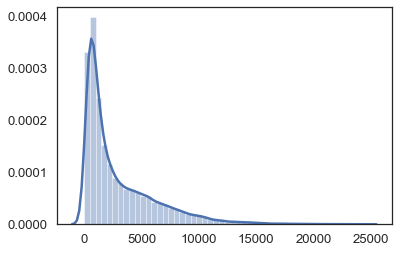

In [56]:
sns.distplot([len(x) for x in df_meertens["gt text"].values])

## Check evaluations

### Meertens

In [16]:
df_meertens[["CER","WER","WER (order independent)", "jaccard_coefficient", "dictionary lookup ocr", "levenshtein_dist_normalized"]].corr()

,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup ocr,levenshtein_dist_normalized
CER,1.000000,0.899711,0.879728,-0.675723,-0.560723,0.847722
WER,0.899711,1.000000,0.986240,-0.810082,-0.686075,0.779682
WER (order independent),0.879728,0.986240,1.000000,-0.802535,-0.667095,0.765277
jaccard_coefficient,-0.675723,-0.810082,-0.802535,1.000000,0.857523,-0.810541
dictionary lookup ocr,-0.560723,-0.686075,-0.667095,0.857523,1.000000,-0.675117
levenshtein_dist_normalized,0.847722,0.779682,0.765277,-0.810541,-0.675117,1.000000


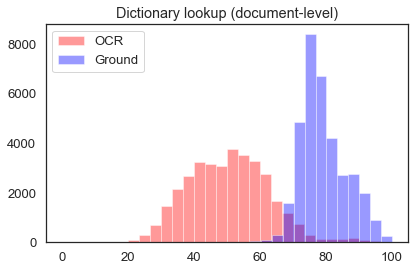

In [38]:
sns.distplot(df_meertens[["dictionary lookup ocr"]].values, label="OCR", kde=False, color="red", bins=30)
sns.distplot(df_meertens[["dictionary lookup gt"]].values, label="Ground", kde=False, color="blue", bins=30)
plt.title("Dictionary lookup (document-level)")
plt.legend()
plt.tight_layout()

### Impact

In [22]:
df_impact[["CER_ocr","WER_ocr","WER (order independent)_ocr", "jaccard_coefficient_ocr", "dictionary lookup ocr", "levenshtein_dist_normalized_ocr"]].corr()

,CER_ocr,WER_ocr,WER (order independent)_ocr,jaccard_coefficient_ocr,dictionary lookup ocr,levenshtein_dist_normalized_ocr
CER_ocr,1.000000,0.897755,0.854261,-0.722205,-0.520542,0.951601
WER_ocr,0.897755,1.000000,0.985484,-0.908134,-0.752422,0.940990
WER (order independent)_ocr,0.854261,0.985484,1.000000,-0.925155,-0.778075,0.915839
jaccard_coefficient_ocr,-0.722205,-0.908134,-0.925155,1.000000,0.859455,-0.793413
dictionary lookup ocr,-0.520542,-0.752422,-0.778075,0.859455,1.000000,-0.583781
levenshtein_dist_normalized_ocr,0.951601,0.940990,0.915839,-0.793413,-0.583781,1.000000


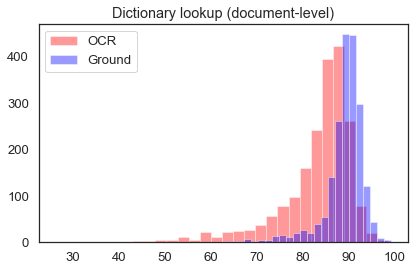

In [40]:
sns.distplot(df_impact[["dictionary lookup ocr"]].values, label="OCR", kde=False, color="red", bins=30)
#sns.distplot(df_impact[["dictionary lookup reocr"]].values, label="reOCR", kde=False, color="purple", bins=30)
sns.distplot(df_impact[["dictionary lookup gt"]].values, label="Ground", kde=False, color="blue", bins=30)
plt.title("Dictionary lookup (document-level)")
plt.legend()
plt.tight_layout()

### DBNL

In [33]:
df_dbnl[["CER","WER","WER (order independent)", "jaccard_coefficient", "dictionary lookup ocr"]].corr()

,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup ocr
CER,1.000000,0.826739,0.709254,-0.348190,-0.239735
WER,0.826739,1.000000,0.778687,-0.548721,-0.446704
WER (order independent),0.709254,0.778687,1.000000,-0.491267,-0.241575
jaccard_coefficient,-0.348190,-0.548721,-0.491267,1.000000,0.812703
dictionary lookup ocr,-0.239735,-0.446704,-0.241575,0.812703,1.000000


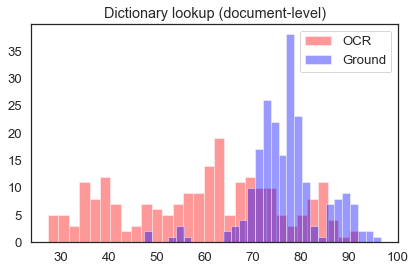

In [37]:
sns.distplot(df_dbnl[["dictionary lookup ocr"]].values, label="OCR", kde=False, color="red", bins=30)
sns.distplot(df_dbnl[["dictionary lookup gt"]].values, label="Ground", kde=False, color="blue", bins=30)
plt.title("Dictionary lookup (document-level)")
plt.legend()
plt.tight_layout()

### Books

In [35]:
df_books[["CER","WER","WER (order independent)", "jaccard_coefficient", "dictionary lookup ocr", "levenshtein_dist_normalized"]].corr()

,CER,WER,WER (order independent),jaccard_coefficient,dictionary lookup ocr,levenshtein_dist_normalized
CER,1.000000,0.871427,0.849850,-0.250024,-0.160438,0.996232
WER,0.871427,1.000000,0.965775,-0.603115,-0.453135,0.879984
WER (order independent),0.849850,0.965775,1.000000,-0.564924,-0.426423,0.858740
jaccard_coefficient,-0.250024,-0.603115,-0.564924,1.000000,0.791754,-0.271346
dictionary lookup ocr,-0.160438,-0.453135,-0.426423,0.791754,1.000000,-0.177838
levenshtein_dist_normalized,0.996232,0.879984,0.858740,-0.271346,-0.177838,1.000000


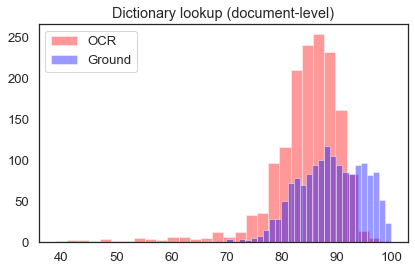

In [36]:
sns.distplot(df_books[["dictionary lookup ocr"]].values, label="OCR", kde=False, color="red", bins=30)
sns.distplot(df_books[["dictionary lookup gt"]].values, label="Ground", kde=False, color="blue", bins=30)
plt.title("Dictionary lookup (document-level)")
plt.legend()
plt.tight_layout()

### ANP

In [43]:
df_anp[["CER","WER","WER (order independent)", "jaccard_coefficient", "lookup ocr", "levenshtein_dist_normalized"]].corr()

,CER,WER,WER (order independent),jaccard_coefficient,lookup ocr,levenshtein_dist_normalized
CER,1.000000,0.970188,0.961511,-0.585459,-0.472247,0.767849
WER,0.970188,1.000000,0.997205,-0.529608,-0.456029,0.648423
WER (order independent),0.961511,0.997205,1.000000,-0.504085,-0.434179,0.616483
jaccard_coefficient,-0.585459,-0.529608,-0.504085,1.000000,0.762141,-0.799415
lookup ocr,-0.472247,-0.456029,-0.434179,0.762141,1.000000,-0.645799
levenshtein_dist_normalized,0.767849,0.648423,0.616483,-0.799415,-0.645799,1.000000


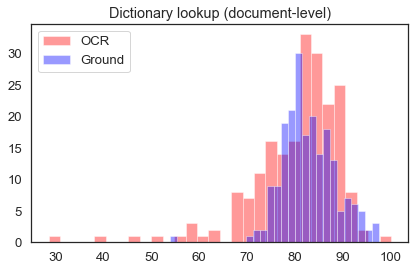

In [42]:
sns.distplot(df_anp[["lookup ocr"]].values, label="OCR", kde=False, color="red", bins=30)
sns.distplot(df_anp[["lookup gt"]].values, label="Ground", kde=False, color="blue", bins=30)
plt.title("Dictionary lookup (document-level)")
plt.legend()
plt.tight_layout()